## Engineering mixed variables

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

We've seen that mixed variables are those which values contain both numbers and labels. A mixed variable can contain numbers OR labels in different observations, or numbers AND labels in each observation.

For example, the variable vehicle registration is an example of letters and numbers combined in each observation (e.g.,  NK11DGX), whereas the variable number of missed payments as we covered in section 2, is an example of numbers or labels, where the values can be 0, 1, 2 or 3, or A and D.

See section 3 on Variable types, lectures on mixed variables for a refresher.

### How can we engineer mixed variables?

We can sometimes derive meaningful features by extracting the categorical part in one variable and the numerical part in a different variable. Therefore, we obtain 2 variables from the original one. Then we proceed with the derived variables as we would do with any categorical or numerical variable.

Let's explore how we can do that.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Example 1: the observations of the variable contain either numbers or strings

In [2]:
# For this part, we will work with the simulated sample we used in section 2

# open_il_24m indicates:
# "Number of installment accounts opened in past 24 months".
# Installment accounts are those that, at the moment of acquiring them,
# there is a set period and amount of repayments agreed between the
# lender and borrower. An example of this is a car loan, or a student loan.
# the borrowers know that they are going to pay a fixed amount over a fixed period

data = pd.read_csv('../Datasets/sample_s2.csv')

data.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [3]:
# let's inspect the mixed variable

data['open_il_24m'].unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

The variable is mixed: some observations show numbers as values whereas others show one of three codes which meanings are depicted below.

In [4]:
# Fictitious meaning of the different letters / codes:

# 'A': couldn't identify the person
# 'B': no relevant data
# 'C': person seems not to have any account open

Text(0, 0.5, 'Number of borrowers')

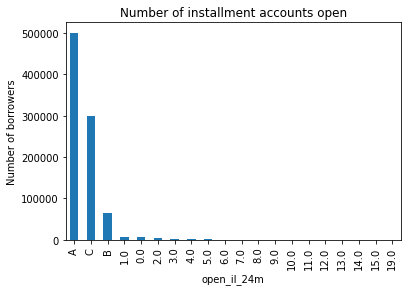

In [5]:
# let's inspect the number of observations per value of the variable

fig = data['open_il_24m'].value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

In [6]:
# extract numerical part
data['open_il_24m_numerical'] = pd.to_numeric(data["open_il_24m"],
                                              errors='coerce',
                                              downcast='integer')

In [7]:
# extract categorical part
data['open_il_24m_categorical'] = np.where(data['open_il_24m_numerical'].isnull(),
                                           data['open_il_24m'],
                                           np.nan)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,A,NaN,A
2,1077175,A,NaN,A
3,1076863,A,NaN,A
4,1075358,A,NaN,A


Note how in the observation where the categorical variable displays a value, the numerical variable contains NA, and vice versa.

In [8]:
# let's inspect those instances of the dataset where numerical is not null
# when the numerical variable is not null the categorical is null
# and vice versa

data.dropna(subset = ['open_il_24m_numerical'], axis=0).head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
466285,68444620,0.0,0.0,NaN
466286,68547583,1.0,1.0,NaN
466287,67849662,0.0,0.0,NaN
466288,68506885,2.0,2.0,NaN
466289,68341763,4.0,4.0,NaN


In [9]:
# let's inspect the missing data in the new variables:
# when the numerical variable is not null the categorical is null
# and vice versa

data.isnull().mean()

id                         0.000000
open_il_24m                0.000000
open_il_24m_numerical      0.975916
open_il_24m_categorical    0.024084
dtype: float64

### Example 1: the observations of the variable contain numbers and strings

In [10]:
# let's load again the titanic dataset for demonstration

data = pd.read_csv('../Datasets/titanic.csv', usecols=['ticket', 'cabin', 'survived'])

data.head()

,survived,ticket,cabin
0,1,24160,B5
1,1,113781,C22
2,0,113781,C22
3,0,113781,C22
4,0,113781,C22


In [11]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [12]:
data['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

Both cabin and ticket contain a numerical part and a categorical part in their values.

In [13]:
# let's extract the numerical and categorical part for cabin

data['cabin_num'] = data['cabin'].str.extract('(\d+)') # captures numerical part
data['cabin_cat'] = data['cabin'].str[0] # captures the first letter

data[['cabin', 'cabin_num', 'cabin_cat']].head()

,cabin,cabin_num,cabin_cat
0,B5,5,B
1,C22,22,C
2,C22,22,C
3,C22,22,C
4,C22,22,C


In [14]:
# let's extract the numerical and categorical part for ticket
# the variable ticket is extremely dirty, so there is only so much that we
# can do, but here are some ideas:

# extract the last bit of ticket as number
data['ticket_num'] = data['ticket'].apply(lambda s: s.split()[-1])
data['ticket_num'] = pd.to_numeric(data['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
data['ticket_cat'] = data['ticket'].apply(lambda s: s.split()[0])
data['ticket_cat'] = np.where(data['ticket_cat'].str.isdigit(), np.nan,
                              data['ticket_cat'])

data[['ticket', 'ticket_num', 'ticket_cat']].head(20)

,ticket,ticket_num,ticket_cat
0,24160,24160.0,NaN
1,113781,113781.0,NaN
2,113781,113781.0,NaN
3,113781,113781.0,NaN
4,113781,113781.0,NaN
5,19952,19952.0,NaN
6,13502,13502.0,NaN
7,112050,112050.0,NaN
8,11769,11769.0,NaN
9,PC 17609,17609.0,PC


In [15]:
data['ticket_cat'].unique()

array([nan, 'PC', 'W.E.P.', 'WE/P', 'F.C.', 'P/PP', 'C.A.', 'C.A./SOTON',
       'S.O.P.', 'F.C.C.', 'SC/AH', 'W./C.', 'S.O.C.', 'SC/PARIS',
       'S.W./PP', 'W/C', 'SCO/W', 'SO/C', 'SC/Paris', 'SC', 'S.O./P.P.',
       'S.C./PARIS', 'SC/A.3', 'SW/PP', 'CA', 'SOTON/O2', 'C',
       'SOTON/O.Q.', 'A/4', 'PP', 'A/5', 'A./5.', 'A/5.', 'SOTON/OQ',
       'S.P.', 'SC/A4', 'AQ/3.', 'STON/O2.', 'A.', 'LINE', 'STON/O',
       'AQ/4', 'A/S', 'A.5.', 'A4.', 'A/4.', 'Fa', 'S.C./A.4.', 'LP',
       'CA.', 'STON/OQ.'], dtype=object)

<Axes: >

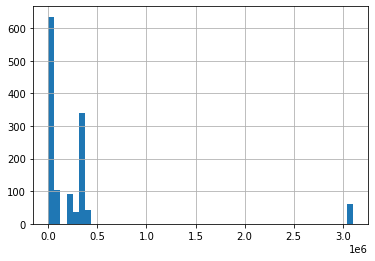

In [16]:
data['ticket_num'].hist(bins=50)